In [6]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier



In [7]:
# Load the digits dataset
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [8]:
digits.data.shape
digits.images.shape

(1797, 8, 8)

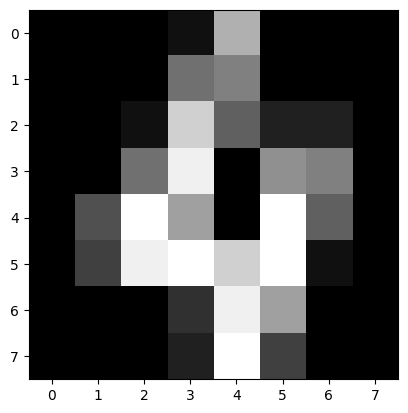

In [9]:
x = digits.images[4]
plt.gray()
plt.imshow(x)

In [10]:
# preprocess the data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2) 
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# create a metrics function to evaluate the model
from sklearn.metrics import accuracy_score , recall_score, precision_score

def calculate_metrics(y_train , y_test , y_pred_tr , y_pred_te):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_tr)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_te)

    p = precision_score(y_true=y_test, y_pred=y_pred_te, average='macro')
    r = recall_score(y_true=y_test, y_pred=y_pred_te, average='macro')

    print(f'acc train={acc_train}, acc test={acc_test}, p={p}, r={r}')

    return acc_train, acc_test, p, r

## classification

In [12]:
X_train.shape , X_test.shape

((1437, 64), (360, 64))

In [13]:
# reduce the dimensionality of the data

from sklearn.decomposition import PCA
pca = PCA(n_components=32)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
X_train.shape , X_test.shape

((1437, 32), (360, 32))

## RANDOM FOREST

In [15]:
rf = RandomForestClassifier(max_depth=128 , n_estimators=100)
rf.fit(X_train, y_train)

y_pred_tr = rf.predict(X_train)
y_pred_te = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=1.0, acc test=0.9805555555555555, p=0.9808890650826013, r=0.9805993792835899


# SVM

In [16]:
Svm = svm.SVC(kernel='poly')
Svm.fit(X_train, y_train)

y_pred_tr = Svm.predict(X_train)
y_pred_te = Svm.predict(X_test)

acc_train_Svm, acc_test_Svm, p_Svm, r_Svm = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.9979123173277662, acc test=0.9888888888888889, p=0.9885714285714287, r=0.9884729649435531


# ANN

In [17]:
ANN = MLPClassifier(hidden_layer_sizes=256 , batch_size=64 , learning_rate='adaptive')
ANN.fit(X_train , y_train)

y_pred_tr = ANN.predict(X_train)
y_pred_te = ANN.predict(X_test)

acc_train_ANN, acc_test_ANN, p_ANN, r_ANN = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=1.0, acc test=0.9805555555555555, p=0.9802322453371592, r=0.9797096561802444


# KNN

In [18]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)

y_pred_tr = KNN.predict(X_train)
y_pred_te = KNN.predict(X_test)

acc_train_KNN, acc_test_KNN, p_KNN, r_KNN = calculate_metrics(y_train, y_test, y_pred_tr, y_pred_te)

acc train=0.9902574808629089, acc test=0.9888888888888889, p=0.988825817796406, r=0.9882063882063882


# Compare the models

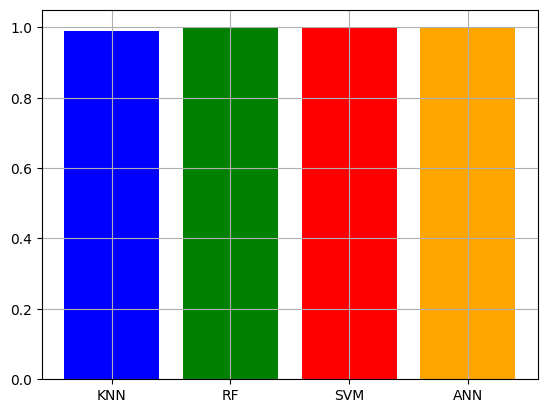

In [19]:
# Plot train data accuracy for models
acc_train = [acc_train_KNN, acc_train_rf, acc_train_Svm, acc_train_ANN]
title = ['KNN', 'RF', 'SVM', 'ANN']
colors = ['blue', 'green', 'red', 'orange']
import matplotlib.pyplot as plt
plt.bar(title, acc_train , color=colors)
plt.grid()

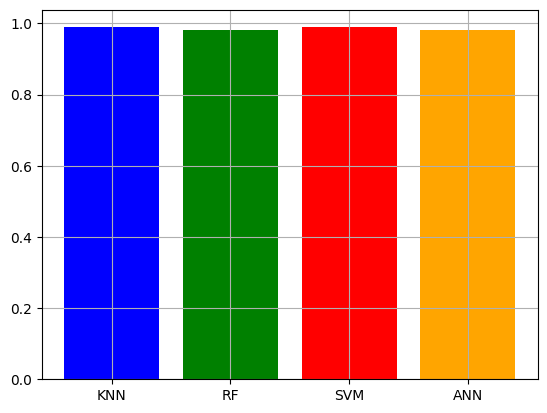

In [20]:
# Plot test data accuracy for models
acc_test = [acc_test_KNN, acc_test_rf, acc_test_Svm, acc_test_ANN]
title = ['KNN', 'RF', 'SVM', 'ANN']
colors = ['blue', 'green', 'red', 'orange']
import matplotlib.pyplot as plt
plt.bar(title, acc_test, color=colors)
plt.grid()

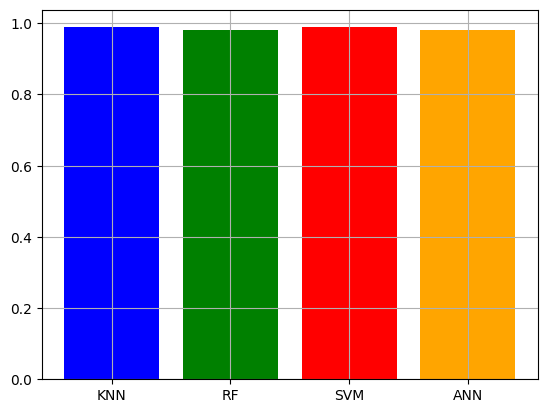

In [21]:
# Plot precision for models
p = [p_KNN, p_rf, p_Svm, p_ANN]
title = ['KNN', 'RF', 'SVM', 'ANN']
colors = ['blue', 'green', 'red', 'orange']
import matplotlib.pyplot as plt
plt.bar(title, p, color=colors)
plt.grid()

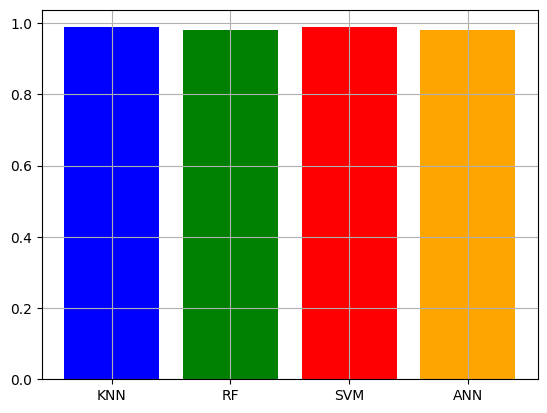

In [22]:
# Plot recall for models
r = [r_KNN, r_rf, r_Svm, r_ANN]
title = ['KNN', 'RF', 'SVM', 'ANN']
colors = ['blue', 'green', 'red', 'orange']
import matplotlib.pyplot as plt
plt.bar(title, r, color=colors)
plt.grid()